# Sentiment Analysis of COVID-19 Vaccine Tweets (28/08/2021)


## Data Access

In [93]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from textblob import TextBlob
import plotly.express as px

In [94]:
df = pd.read_csv("D:/DataScience/project/Workspace/vaccination_all_tweets.csv", quotechar='"', delimiter=',').dropna()
df

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA","Aggregator of Asian American news; scanning diverse sources 24/7/365. RT's, Follows and 'Likes' will fuel me 👩‍💻",2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF,['PfizerBioNTech'],Twitter for Android,0,0,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P,"['coronavirus', 'SputnikV', 'AstraZeneca', 'PfizerBioNTech', 'Moderna', 'Covid_19']",Twitter for Android,0,0,False
6,1337851215875608579,Gunther Fehlinger,"Austria, Ukraine and Kosovo","End North Stream 2 now - the pipeline of corruption, funding Russias war against Ukraine,Georgia, Syria and political intervention in USA and EU must be stopped",2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,"it is a bit sad to claim the fame for success of #vaccination on patriotic competition between USA, Canada, UK and… https://t.co/IfMrAyGyTP",['vaccination'],Twitter Web App,0,4,False
9,1337842295857623042,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafianspower1\n#PoliticalScience #InternationalAffairs \n#PAKUSTV #Newyork #Islamabad,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12 19:30:33,"#CovidVaccine \n\nStates will start getting #COVID19Vaccine Monday, #US says \n#pakustv #NYC #Healthcare #GlobalGoals… https://t.co/MksOvBvs5w","['CovidVaccine', 'COVID19Vaccine', 'US', 'pakustv', 'NYC', 'Healthcare', 'GlobalGoals']",Twitter Web App,0,0,False
10,1337841934170255365,Tamer Yazar,Turkey-Israel,"Im Market Analyst, also Editor... working (freelance) for some companies that need analysis for their products in Int. Markets \n- Instagram : tamervisits -",2009-09-17 16:45:16,1302,78,339,False,2020-12-12 19:29:07,"while deaths are closing in on the 300,000 mark... millions of people wait #PfizerBioNTech #Vaccine !\n-\nThe first U… https://t.co/uQ3A2f7SVP","['PfizerBioNTech', 'Vaccine']",Twitter Web App,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177011,1428288192210374662,VaxBLR,"Bengaluru, India","Hourly updates on FREE and PAID 18+ and 45+ vaccine slot availability across #Bengaluru BBMP,URBAN & RURAL",2021-06-21 08:44:34,24,0,0,False,2021-08-19 09:30:15,18-44 #URBAN #Bengaluru #CovidVaccine Availability for 19/08 at 03:00PM\nFREE Slots 0\nPAID Slots \n#COVISHIELD - Dose… https://t.co/C9116FQSvC,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISHIELD']",VaxBlr,0,0,False
177012,1428280699883200512,VaxBLR,"Bengaluru, India","Hourly updates on FREE and PAID 18+ and 45+ vaccine slot availability across #Bengaluru BBMP,URBAN & RURAL",2021-06-21 08:44:34,24,0,0,False,2021-08-19 09:00:29,"45+ #BBMP #Bengaluru #CovidVaccine Availability for 19/08 at 02:30PM\nFREE Slots \n#COVISHIELD - Dose1:9, Dose2:2… https://t.co/plTlxFM6Bp","['BBMP', 'Bengaluru', 'CovidVaccine', 'COVISHIELD']",VaxBlr,0,1,False
177013,1428280655767502850,VaxBLR,"Bengaluru, India","Hourly updates on FREE and PAID 18+ and 45+ vaccine slot availability across #Bengaluru BBMP,URBAN & RURAL",2021-06-21 08:44:34,24,0,0,False,2021-08-19 09:00:19,45+ #URBAN #Bengaluru #CovidVaccine Availability for 19/08 at 02:30PM\nFREE Slots 0\nPAID Slots \n#COVISHIELD - Dose1:… https://t.co/PnrO67Ts47,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISHIELD']",VaxBlr,0,0,False
177014,1428273162270035969,VaxBLR,"Bengaluru, India","Hourly updates on FREE and PAID 18+ and 45+ vaccine slot availability across #Bengaluru BBMP,URBAN & RURAL",2021-06-21 08:44:34,24,0,0,False,2021-08-19 08:30:32,"18-44 #BBMP #Bengaluru #CovidVaccine Availability for 19/08 at 

In [95]:
print(df.columns)
print(df.shape)

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')
(89477, 16)


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89477 entries, 0 to 177015
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                89477 non-null  int64 
 1   user_name         89477 non-null  object
 2   user_location     89477 non-null  object
 3   user_description  89477 non-null  object
 4   user_created      89477 non-null  object
 5   user_followers    89477 non-null  int64 
 6   user_friends      89477 non-null  int64 
 7   user_favourites   89477 non-null  int64 
 8   user_verified     89477 non-null  bool  
 9   date              89477 non-null  object
 10  text              89477 non-null  object
 11  hashtags          89477 non-null  object
 12  source            89477 non-null  object
 13  retweets          89477 non-null  int64 
 14  favorites         89477 non-null  int64 
 15  is_retweet        89477 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 10.4+ MB


# Data Wrangling & Preprocessing

In [97]:
df = df.drop_duplicates('text')
print(df.shape)

(89354, 16)


In [98]:

def clean_tweet_text(text):
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = text.lower()
    return text


df['text'].transform(clean_tweet_text)
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA","Aggregator of Asian American news; scanning diverse sources 24/7/365. RT's, Follows and 'Likes' will fuel me 👩‍💻",2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF,['PfizerBioNTech'],Twitter for Android,0,0,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P,"['coronavirus', 'SputnikV', 'AstraZeneca', 'PfizerBioNTech', 'Moderna', 'Covid_19']",Twitter for Android,0,0,False
6,1337851215875608579,Gunther Fehlinger,"Austria, Ukraine and Kosovo","End North Stream 2 now - the pipeline of corruption, funding Russias war against Ukraine,Georgia, Syria and political intervention in USA and EU must be stopped",2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,"it is a bit sad to claim the fame for success of #vaccination on patriotic competition between USA, Canada, UK and… https://t.co/IfMrAyGyTP",['vaccination'],Twitter Web App,0,4,False
9,1337842295857623042,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafianspower1\n#PoliticalScience #InternationalAffairs \n#PAKUSTV #Newyork #Islamabad,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12 19:30:33,"#CovidVaccine \n\nStates will start getting #COVID19Vaccine Monday, #US says \n#pakustv #NYC #Healthcare #GlobalGoals… https://t.co/MksOvBvs5w","['CovidVaccine', 'COVID19Vaccine', 'US', 'pakustv', 'NYC', 'Healthcare', 'GlobalGoals']",Twitter Web App,0,0,False
10,1337841934170255365,Tamer Yazar,Turkey-Israel,"Im Market Analyst, also Editor... working (freelance) for some companies that need analysis for their products in Int. Markets \n- Instagram : tamervisits -",2009-09-17 16:45:16,1302,78,339,False,2020-12-12 19:29:07,"while deaths are closing in on the 300,000 mark... millions of people wait #PfizerBioNTech #Vaccine !\n-\nThe first U… https://t.co/uQ3A2f7SVP","['PfizerBioNTech', 'Vaccine']",Twitter Web App,0,0,False


In [99]:

df['date'] = pd.to_datetime(df['date']).dt.date
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA","Aggregator of Asian American news; scanning diverse sources 24/7/365. RT's, Follows and 'Likes' will fuel me 👩‍💻",2009-04-08 17:52:46,405,1692,3247,False,2020-12-20,Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF,['PfizerBioNTech'],Twitter for Android,0,0,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12,#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P,"['coronavirus', 'SputnikV', 'AstraZeneca', 'PfizerBioNTech', 'Moderna', 'Covid_19']",Twitter for Android,0,0,False
6,1337851215875608579,Gunther Fehlinger,"Austria, Ukraine and Kosovo","End North Stream 2 now - the pipeline of corruption, funding Russias war against Ukraine,Georgia, Syria and political intervention in USA and EU must be stopped",2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12,"it is a bit sad to claim the fame for success of #vaccination on patriotic competition between USA, Canada, UK and… https://t.co/IfMrAyGyTP",['vaccination'],Twitter Web App,0,4,False
9,1337842295857623042,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafianspower1\n#PoliticalScience #InternationalAffairs \n#PAKUSTV #Newyork #Islamabad,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12,"#CovidVaccine \n\nStates will start getting #COVID19Vaccine Monday, #US says \n#pakustv #NYC #Healthcare #GlobalGoals… https://t.co/MksOvBvs5w","['CovidVaccine', 'COVID19Vaccine', 'US', 'pakustv', 'NYC', 'Healthcare', 'GlobalGoals']",Twitter Web App,0,0,False
10,1337841934170255365,Tamer Yazar,Turkey-Israel,"Im Market Analyst, also Editor... working (freelance) for some companies that need analysis for their products in Int. Markets \n- Instagram : tamervisits -",2009-09-17 16:45:16,1302,78,339,False,2020-12-12,"while deaths are closing in on the 300,000 mark... millions of people wait #PfizerBioNTech #Vaccine !\n-\nThe first U… https://t.co/uQ3A2f7SVP","['PfizerBioNTech', 'Vaccine']",Twitter Web App,0,0,False


# Exploratory Data Analysis (EDA)

In [100]:
df.describe()

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,8.935400e+04,8.935400e+04,89354.000000,8.935400e+04,89354.000000,89354.000000
mean,1.393098e+18,1.616463e+05,1403.080825,1.551215e+04,3.570797,16.030642
std,2.207549e+16,1.110727e+06,6741.785908,4.369745e+04,59.713161,209.520655
min,1.337728e+18,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,1.375200e+18,1.420000e+02,145.000000,3.490000e+02,0.000000,0.000000
50%,1.394919e+18,6.880000e+02,427.000000,2.356000e+03,0.000000,1.000000
75%,1.410135e+18,3.584000e+03,1186.000000,1.145875e+04,1.000000,4.000000
max,1.431187e+18,1.603999e+07,516578.000000,1.214813e+06,11288.000000,25724.000000


<AxesSubplot:>

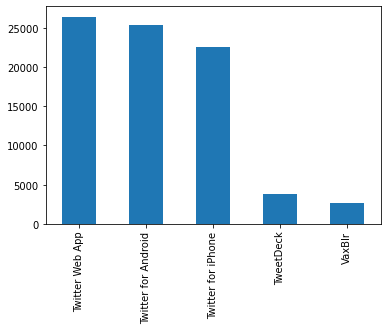

In [101]:

df['source'].value_counts().head(n=5).plot.bar()

<AxesSubplot:>

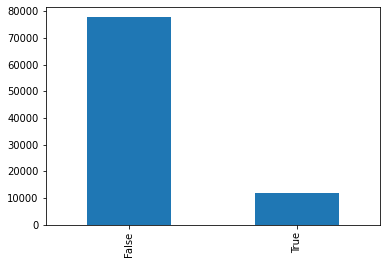

In [102]:
df['user_verified'].value_counts().head(n=10).plot.bar()

In [103]:
df[df['user_verified'] == True].head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
15,1337789467038523394,City A.M.,"London, England","London's business newspaper - News, Opinion, and Analysis. For all distribution queries, see @CityAMDist.",2009-06-09 13:53:06,66224,603,771,True,2020-12-12,Trump announces #vaccine rollout 'in less than 24 hours'\n\nThe first Americans will be vaccinated against… https://t.co/2FzQSMnhoY,['vaccine'],Twitter for iPhone,0,1,False
17,1337783770070409218,ILKHA,Türkiye,Official Twitter account of Ilke News Agency /,2015-05-22 08:31:12,4056,6,3,True,2020-12-12,"Coronavirus: Iran reports 8,201 new cases, 221 deaths in the last 24 hours #Iran #coronavirus #PfizerBioNTech… https://t.co/mwDNAdmb7F","['Iran', 'coronavirus', 'PfizerBioNTech']",TweetDeck,3,5,False
22,1337773965595598848,City A.M.,"London, England","London's business newspaper - News, Opinion, and Analysis. For all distribution queries, see @CityAMDist.",2009-06-09 13:53:06,66224,603,771,True,2020-12-12,Trump announces #vaccine rollout 'in less than 24 hours'\n\nThe first Americans will be vaccinated against… https://t.co/P9esXr3zpS,['vaccine'],Buffer,1,0,False
43,1337728701820268544,City A.M.,"London, England","London's business newspaper - News, Opinion, and Analysis. For all distribution queries, see @CityAMDist.",2009-06-09 13:53:06,66224,603,771,True,2020-12-12,Trump announces #vaccine rollout 'in less than 24 hours'\n\nThe first Americans will be vaccinated against… https://t.co/6379SZjNQi,['vaccine'],Twitter Web App,0,2,False
44,1337727767551553536,Daily News Egypt,Egypt,Egypt's Only Daily Independent Newspaper in English,2009-04-26 07:56:24,278080,116,765,True,2020-12-12,#FDA authorizes #PfizerBioNTech #coronavirus vaccine for emergency use\nhttps://t.co/VZ6bDPbbPG,"['FDA', 'PfizerBioNTech', 'coronavirus']",Twitter Web App,1,1,False


In [104]:
# what are the top 10 most retweeted tweets
pd.set_option('display.max_colwidth', 400)
df.sort_values(by='retweets', ascending=False)[['text', 'date', 'user_name', 'user_location', 'hashtags', 'favorites', 'retweets']].head(n=10)

,text,date,user_name,user_location,hashtags,favorites,retweets
68358,"RDIF, Laboratorios Richmond launched production of #SputnikV in Argentina, the first country in Latin America to ma… https://t.co/oEMaUwVR92",2021-04-20,Sputnik V,"Moscow, Russia",['SputnikV'],25724,11288
46053,Why we need Two Doses of mRNA Vaccine 💉 #vaccines #COVID19 #Pfizer #moderna #VaccinesSaveLives #vaccinated https://t.co/RFRmPAyubD,2021-04-01,hotvickkrishna,"Manhattan, NY","['vaccines', 'COVID19', 'Pfizer', 'moderna', 'VaccinesSaveLives', 'vaccinated']",19622,7695
66822,ICMR study shows #COVAXIN neutralises against multiple variants of SARS-CoV-2 and effectively neutralises the doubl… https://t.co/0IYwr0KymJ,2021-04-21,ICMR,New Delhi,['COVAXIN'],11995,4851
76306,#Argentina's actor breaks into a live TV to show his #SputnikV vaccination certificate &amp; express his gratitude. \n\nT… https://t.co/N1NwjkD83y,2021-05-19,Sputnik V,"Moscow, Russia","['Argentina', 'SputnikV']",14412,2550
17118,"Got my jab. For the curious, it was #Covaxin. \n\nFelt secure, will travel safely. https://t.co/8PL7PZMEsf",2021-03-01,Dr. S. Jaishankar,"New Delhi, India",['Covaxin'],22815,2360
53045,I see it’s going around with signature cropped....so here is the original:) #covid 19 #vaccine #pfizer #moderna… https://t.co/eoqT74V78A,2021-04-12,dawnymock,Fredericton New Brunswick,"['covid', 'vaccine', 'pfizer', 'moderna']",10175,2299
7126,"New research published in Microbiology &amp; Infectious Diseases, immunologist J. Bart Classen warns #mRNA technology u… https://t.co/OWUTf5ShHO",2021-02-10,Robert F. Kennedy Jr,"Los Angles, California",['mRNA'],3090,2247
24268,"#Covaxin 🇮🇳 , made by Hyderabad-based Bharat Biotech International Limited, has been declared ""Safe, Immunogenic wi… https://t.co/FAUOEHJmAw",2021-03-09,Megh Updates 🚨,Turn on Notification 🔔,['Covaxin'],9458,2095
32826,A batch of fake Sputnik V vaccines was confiscated in Mexico. See this comparison of the genuine #SputnikV with a f… https://t.co/J7PxMq2e1M,2021-03-18,Sputnik V,"Moscow, Russia",['SputnikV'],3473,1980
17543,Prime Minister Narendra Modi choose early morning time to take #covaxin . No traffic was stopped . Traveled normall… https://t.co/udxAqk9xEC,2021-03-01,Megh Updates 🚨,Turn on Notification 🔔,['covaxin'],8153,1980


In [105]:
df.sort_values(by=['date', 'favorites'], ascending=[True, False])[['text', 'date', 'user_name', 'user_location', 'hashtags', 'favorites', 'retweets']].head(n=10)

,text,date,user_name,user_location,hashtags,favorites,retweets
35,An immigrant Muslim couple find the COVID-19 Vaccine. \n\n#CovidVaccine #PfizerBioNTech #Pfizervaccine #PfizerProud,2020-12-12,Shahjhan Malik | #WearAMask,"Nottinghamshire, England","['CovidVaccine', 'PfizerBioNTech', 'Pfizervaccine', 'PfizerProud']",37,2
293,#UnitedStates : The Federal Aviation Administration (FAA) said Saturday it had approved the use of the… https://t.co/xvwUEvZZk2,2020-12-12,DD News,"New Delhi, India",['UnitedStates'],21,4
25,No.1 of 2 done.\n\n#ThankYouNHS @NHSuk @MHRAgovuk and #PfizerBioNTech @pfizer for making the #CovidVaccine dream poss… https://t.co/3KvJ7UP432,2020-12-12,Devan Surendran,"Nottingham, England","['ThankYouNHS', 'PfizerBioNTech', 'CovidVaccine']",10,1
17,"Coronavirus: Iran reports 8,201 new cases, 221 deaths in the last 24 hours #Iran #coronavirus #PfizerBioNTech… https://t.co/mwDNAdmb7F",2020-12-12,ILKHA,Türkiye,"['Iran', 'coronavirus', 'PfizerBioNTech']",5,3
298,#UnitedStates : The Federal Aviation Administration (FAA) said Saturday it had approved the use of the… https://t.co/Lyq594UEks,2020-12-12,DD India,"New Delhi, India",['UnitedStates'],5,0
6,"it is a bit sad to claim the fame for success of #vaccination on patriotic competition between USA, Canada, UK and… https://t.co/IfMrAyGyTP",2020-12-12,Gunther Fehlinger,"Austria, Ukraine and Kosovo",['vaccination'],4,0
301,I am beyond relieved to share that I’ll be among the first to receive the #CovidVaccine from #PfizerBioNTech. Thank… https://t.co/1py4jUhGzU,2020-12-12,"Taryn Schuelke, CT, CCLS","Houston, TX","['CovidVaccine', 'PfizerBioNTech']",4,2
18,.@Pfizer will rake in billions from its expensive #CovidVaccine but @AlbertBourla refuses to cut the price for lowe… https://t.co/eC94w3TUl0,2020-12-12,Braderz73🌹#GTTO 🇪🇺 🇬🇧,"Bristol, UK",['CovidVaccine'],3,3
16,UPDATED: #YellowFever &amp; #COVID19 #ImmunityPassports - Part Two\n\n#SARSCoV2 #PfizerBioNtech #Britain #December… https://t.co/qKT7Rst9aW,2020-12-12,STOPCOMMONPASS.ORG,Global,"['YellowFever', 'COVID19', 'ImmunityPassports', 'SARSCoV2', 'PfizerBioNtech', 'Britain', 'December']",2,2
21,Anyone wondering why day after #PfizerBioNTech approval in the UK people were getting vaccinated but all we are tol… https://t.co/tPSyL9CUYE,2020-12-12,"Richard Dunne, MD","Rochester, NY",['PfizerBioNTech'],2,0


# Sentiment Analysis

We will be using the `TextBlob` library to perform sentiment analysis on the tweets in our dataset. `TextBlob` provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

In [106]:
testimonial = TextBlob("So excited to get my vaccine!")
print(testimonial.sentiment)
testimonial = TextBlob("Is the vaccine painful?")
print(testimonial.sentiment)
testimonial = TextBlob("The Pfizer vaccine is now FDA approved")
print(testimonial.sentiment)

Sentiment(polarity=0.46875, subjectivity=0.75)
Sentiment(polarity=-0.7, subjectivity=0.9)
Sentiment(polarity=0.0, subjectivity=0.0)


In [107]:
testimonial = TextBlob("I tested positive for COVID-19")
print(testimonial.sentiment)

Sentiment(polarity=0.22727272727272727, subjectivity=0.5454545454545454)


In [108]:
# tweet from Texas Governor Greg Abbott
text = """
Today Texas surpassed 8 million vaccinations. It was just 4 days ago that we passed 7 million.

The positivity rate dropped even lower--to 6.08%--the lowest since May 31st.

Hospitalizations went down again also.

Great job Texans!

Vaccines are always voluntary, never forced.
"""
blob = TextBlob(text)

In [109]:
print("Tags")
print(blob.tags, end="\n\n")

print("Noun Phrases")
print(blob.noun_phrases, end="\n\n")

print("Words")
print(blob.words, end="\n\n")

print("Sentences")
print(blob.sentences, end="\n\n")

Tags
[('Today', 'NN'), ('Texas', 'NNP'), ('surpassed', 'VBD'), ('8', 'CD'), ('million', 'CD'), ('vaccinations', 'NNS'), ('It', 'PRP'), ('was', 'VBD'), ('just', 'RB'), ('4', 'CD'), ('days', 'NNS'), ('ago', 'RB'), ('that', 'IN'), ('we', 'PRP'), ('passed', 'VBD'), ('7', 'CD'), ('million', 'CD'), ('The', 'DT'), ('positivity', 'NN'), ('rate', 'NN'), ('dropped', 'VBD'), ('even', 'RB'), ('lower', 'JJR'), ('to', 'TO'), ('6.08', 'CD'), ('%', 'NN'), ('the', 'DT'), ('lowest', 'JJS'), ('since', 'IN'), ('May', 'NNP'), ('31st', 'CD'), ('Hospitalizations', 'NNS'), ('went', 'VBD'), ('down', 'RB'), ('again', 'RB'), ('also', 'RB'), ('Great', 'NNP'), ('job', 'NN'), ('Texans', 'NNPS'), ('Vaccines', 'NNS'), ('are', 'VBP'), ('always', 'RB'), ('voluntary', 'JJ'), ('never', 'RB'), ('forced', 'VBN')]

Noun Phrases
['texas', 'positivity rate', 'may', 'hospitalizations', 'great job', 'vaccines']

Words
['Today', 'Texas', 'surpassed', '8', 'million', 'vaccinations', 'It', 'was', 'just', '4', 'days', 'ago', 'that'

In [110]:
for sentence in blob.sentences:
    print(sentence)
    print("polarity:", sentence.sentiment.polarity)
    print("subjectivity:", sentence.sentiment.subjectivity)
    print()


Today Texas surpassed 8 million vaccinations.
polarity: 0.0
subjectivity: 0.0

It was just 4 days ago that we passed 7 million.
polarity: 0.0
subjectivity: 0.0

The positivity rate dropped even lower--to 6.08%--the lowest since May 31st.
polarity: 0.0
subjectivity: 0.0

Hospitalizations went down again also.
polarity: -0.15555555555555559
subjectivity: 0.2888888888888889

Great job Texans!
polarity: 1.0
subjectivity: 0.75

Vaccines are always voluntary, never forced.
polarity: 0.15000000000000002
subjectivity: 0.2



In [111]:
# let's apply the TextBlob API onto our tweet data to perform sentiment analysis!
df['polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,polarity,subjectivity
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA","Aggregator of Asian American news; scanning diverse sources 24/7/365. RT's, Follows and 'Likes' will fuel me 👩‍💻",2009-04-08 17:52:46,405,1692,3247,False,2020-12-20,Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF,['PfizerBioNTech'],Twitter for Android,0,0,False,0.00,0.125000
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12,#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P,"['coronavirus', 'SputnikV', 'AstraZeneca', 'PfizerBioNTech', 'Moderna', 'Covid_19']",Twitter for Android,0,0,False,0.00,0.033333
6,1337851215875608579,Gunther Fehlinger,"Austria, Ukraine and Kosovo","End North Stream 2 now - the pipeline of corruption, funding Russias war against Ukraine,Georgia, Syria and political intervention in USA and EU must be stopped",2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12,"it is a bit sad to claim the fame for success of #vaccination on patriotic competition between USA, Canada, UK and… https://t.co/IfMrAyGyTP",['vaccination'],Twitter Web App,0,4,False,-0.10,0.500000
9,1337842295857623042,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafianspower1\n#PoliticalScience #InternationalAffairs \n#PAKUSTV #Newyork #Islamabad,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12,"#CovidVaccine \n\nStates will start getting #COVID19Vaccine Monday, #US says \n#pakustv #NYC #Healthcare #GlobalGoals… https://t.co/MksOvBvs5w","['CovidVaccine', 'COVID19Vaccine', 'US', 'pakustv', 'NYC', 'Healthcare', 'GlobalGoals']",Twitter Web App,0,0,False,0.00,0.000000
10,1337841934170255365,Tamer Yazar,Turkey-Israel,"Im Market Analyst, also Editor... working (freelance) for some companies that need analysis for their products in Int. Markets \n- Instagram : tamervisits -",2009-09-17 16:45:16,1302,78,339,False,2020-12-12,"while deaths are closing in on the 300,000 mark... millions of people wait #PfizerBioNTech #Vaccine !\n-\nThe first U… https://t.co/uQ3A2f7SVP","['PfizerBioNTech', 'Vaccine']",Twitter Web App,0,0,False,0.25,0.333333


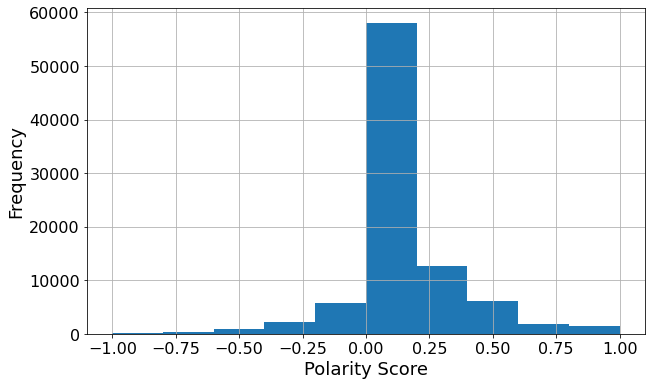

In [112]:
fig = plt.figure(figsize=(10, 6))
df['polarity'].hist()
plt.xlabel('Polarity Score', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
fig.savefig("D:/DataScience/project/Workspace/polarity.png")

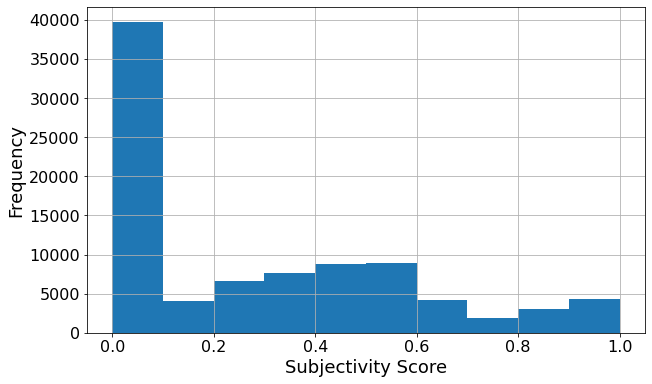

In [113]:
fig = plt.figure(figsize=(10, 6))
df['subjectivity'].hist()
plt.xlabel('Subjectivity Score', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
fig.savefig("D:/DataScience/project/Workspace/subjectivity.png")

## Inspection

In [114]:
# inspect the most negatively charged tweets
df.sort_values(by='polarity', ascending=True)[['text', 'polarity', 'subjectivity']].reset_index(drop=True).head(n=10)

,text,polarity,subjectivity
0,Moderna #2 is done! 💉 So blessed to be fully vaccinated against this devastating virus. #vaccinated #500kdeaths #COVID19 #Moderna,-1.0,1.0
1,#PfizerBioNTech #Vaccin #COVID19 #Moderna \nWHAT THE FUCK !!!!!!\n😂😂😂😂🤣🤣🤣🤣🤣😱😱😱😱😱 https://t.co/NaPnpvhY5W,-1.0,0.6
2,Terrifying account of taking the #Oxford / #OxfordAstraZeneca / #AstraZenaca vack-seeen. \nThink I’ll just take my… https://t.co/cClLy4u3ds,-1.0,1.0
3,@bppoddar terrible and horrible arrangements. No one should get jabbed here. #covaxin,-1.0,1.0
4,"@ajay43 And I m still feeling horrible after yesterday’s jab 😫#Covaxin , grocery #Petrol 😫😫",-1.0,1.0
5,This Government's administration's DESPERATION to cover up for #BigPharma #Pfizer and #Moderna is DISGUSTING 🤮🤮🤮🤮🤮🤮… https://t.co/LtSwDBobzd,-1.0,1.0
6,"Charging Indians for #COVID19 vaccines is horrible, letting vaccine producers charge what they like is unconscionab… https://t.co/wSE2IQpfw0",-1.0,1.0
7,Any one who has had #COVID19 did you get some nasty after taste/smell in your nose/throat? #CoronaUpdate #pfizer #moderna #AstraZeneca,-1.0,1.0
8,Holy crap! I think my arm is about to explode. #armpitpain #Moderna,-1.0,0.8
9,"Had the #OxfordAstraZeneca jab yesterday and just had an awful night,Sweating,Feeling Sick,Headache from hell and a… https://t.co/YcfEizcLND",-1.0,1.0


In [115]:
# inspect the most positively charged tweets
df.sort_values(by='polarity', ascending=False)[['text', 'polarity', 'subjectivity']].reset_index(drop=True).head(n=10)

,text,polarity,subjectivity
0,Happy to end the week fully vaccinated! #seconddose #moderna #tgif https://t.co/Ct1rUfvIQk,1.0,1.00
1,"An excellent article on #Covaxin, India's #COVID19 vaccine. https://t.co/fLlRrV6cB9",1.0,1.00
2,@REDBOXINDIA Best part is that there is NO data on #Covaxin \nIndia has been injecting them on millions,1.0,0.30
3,Which one is best ?\n#COVISHIELD #Covaxin or #Sputnik ??,1.0,0.30
4,But the #PFIZER + #MODERNA \nvaccinations are best. 🚧 🔬💉 https://t.co/NE7U0dMBf2,1.0,0.30
5,@Swamy39 ji you have a very best PR .. @Dharma2X...\nMatlab Swamy ji ne #Covaxin ka bhi Credit ke hi liya....… https://t.co/h6x2qDSfTD,1.0,0.39
6,Excellent news 👏 👏 💉.\n\n#covaxin @bharatbiotech https://t.co/S8tDL3jhmB,1.0,1.00
7,I am so happy! #notthrowingawaymyshot #covidvacccine #moderna https://t.co/g4PfSxiAE9,1.0,1.00
8,Can any one suggest me the best vaccine? 💉\n\n#VaccineFor18Plus\n#vaccine #VaccineRegistration #Odisha #COVIDIOTS… https://t.co/Fzt28TwvVY,1.0,0.30
9,Chipped and happy! #Moderna,1.0,1.00


In [116]:
# inspect the most subjective tweets (NOTE: subjectivity scale ranges from 0 to 1)
df.sort_values(by='subjectivity', ascending=True)[['text', 'polarity', 'subjectivity']].reset_index(drop=True).head(n=10)

,text,polarity,subjectivity
0,@RRRex1206 They are administrating both #Pfizer and #Moderna. When you arrive they separate you into two lines and… https://t.co/IwRDpFoGlA,0.0,0.0
1,It’s time to bring #Covaxin to the US. $OCGN. @Ocugen @BharatBiotech @CovaxinBharat https://t.co/wxxSgBVzS8,0.0,0.0
2,@FightingbackHD Replace 'em all with #Covaxin.,0.0,0.0
3,The second dose of the #Sinopharm vaccine will be administered from June 8\n\n#SriLanka #CovidVaccine #COVID19… https://t.co/moDAO8j6k8,0.0,0.0
4,Mumbai's eastern suburb citizens preferring #COVAXIN over #COVISHIELD Read here: https://t.co/laiL4ibglk https://t.co/Hat1VT7PDz,0.0,0.0
5,"Double Vaccinated Yesterday! Arm is sore, and headache, but that's it for now. #Pfizer #Moderna https://t.co/AgMKk1Rovl",0.0,0.0
6,@sudhirmehtapune Would USA allow sales of india made vaccine #Covaxin in USA? NO. It’s reciprocal,0.0,0.0
7,"why has the maharashtra govt in #Mumbai #Bombay pulled out #Covaxin for the 1st dose since 01st April, 2021?\nit can… https://t.co/PZbWibj7dg",0.0,0.0
8,What about your #COVID19 vaccination? #Covishield #Covaxin,0.0,0.0
9,@abpanandatv So 1st encounter yr nazayez baap Genocide who is giving #Covaxin #Sugar to Pakistan !,0.0,0.0


In [117]:
# inspect the most objective tweets
df.sort_values(by='subjectivity', ascending=False)[['text', 'polarity', 'subjectivity']].reset_index(drop=True).head(n=10)

,text,polarity,subjectivity
0,#IndiaFightsCorona\nThe final vaccine product of #COVAXIN does not contain newborn calf serum at all!\n\nDo not fall p… https://t.co/f0wWeybgAk,0.0,1.0
1,"@CandidSpeaker @SherazAmin15 @fawadchaudhry Yes, thats why it became the testing ground for the fake #SinoVac. Leki… https://t.co/aIEkqB7ef7",-0.5,1.0
2,EVERY SHOT COUNTS......\nHAPPY TO COLLABORATE WITH SIKH COMMUNITY\n#covid19 #covid19vaccine #covaxin #covisheild… https://t.co/iiG42qNxXm,0.8,1.0
3,"I am happy to report that yesterday, I received #Moderna Dose #2 of the COVID-19 vaccine! 💉🩹❤️",1.0,1.0
4,Create a smashing impact on everyone by wearing this stunning #South #Cotton #Saree in Mithila Style. 😍🥰\n\n❤️Sale: U… https://t.co/Bnpfj4Igtc,0.5,1.0
5,Done with both doses of #COVID19Vaccination with #Covaxin 💉\nThank you @BharatBiotech \nImmense gratitude to… https://t.co/krcwTXZj5S,0.0,1.0
6,Important Information about Sinopharm vaccine @Shiffa_ZY \n#Sinopharm #vaccine #Govtofpakistan #COVID19Vaccine https://t.co/yuBqTwIMMX,0.4,1.0
7,Proof of quality and safety of #China's #Sinovac vaccine. Awesome. https://t.co/oZgHV0CxYr,1.0,1.0
8,Govt Sources: \n@Bharatbiotech #Covaxin likely to get EUL from @WHO by end of August reports @PoulomiMSaha,0.0,1.0
9,Is there a master list of every possible #Moderna side effect?,0.0,1.0


In [118]:
# let's inspect how many tweets there were with respect to time
timeline = df.groupby(['date']).count().reset_index()
timeline['count'] = timeline['text']
timeline = timeline[['date', 'count']]

import plotly.express as px
fig = px.bar(timeline, x='date', y='count', labels={'date': 'Date', 'count': 'Tweet Count'})
fig.show()


# Time-Series Sentiment Analysis

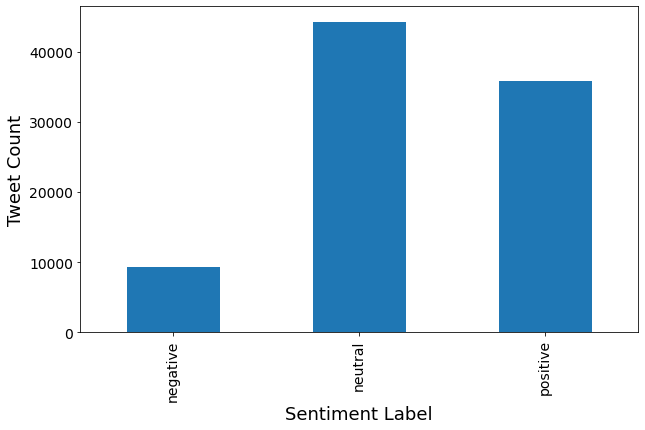

<Figure size 432x288 with 0 Axes>

In [119]:
# polarity values ranging from -1 to 1 are really useful for sentiment analysis
# but let's convert our data to 3 classes (negative, neutral, and positive) so that we can visualize it
criteria = [df['polarity'].between(-1, -0.01), df['polarity'].between(-0.01, 0.01), df['polarity'].between(0.01, 1)]
values = ['negative', 'neutral', 'positive']
df['sentiment'] = np.select(criteria, values, 0)

# plot sentiment counts
fig = plt.figure(figsize=(10, 6))
df['sentiment'].value_counts().sort_index().plot.bar()
plt.xlabel('Sentiment Label', fontsize=18)
plt.ylabel('Tweet Count', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
plt.tight_layout()
fig.savefig("D:/DataScience/project/Workspace/sentiment", bbox_inches='tight');

In [120]:
timeline = df.groupby(['date']).agg(np.nanmean).reset_index()
timeline['count'] = df.groupby(['date']).count().reset_index()['retweets']
timeline = timeline[['date', 'count', 'polarity', 'retweets', 'favorites', 'subjectivity']]
timeline["polarity"] = timeline["polarity"].astype(float)
timeline["subjectivity"] = timeline["subjectivity"].astype(float)
timeline

,date,count,polarity,retweets,favorites,subjectivity
0,2020-12-12,38,0.034952,0.631579,2.868421,0.227801
1,2020-12-13,52,0.055937,1.942308,7.500000,0.255696
2,2020-12-14,83,0.116874,4.698795,29.204819,0.267803
3,2020-12-15,87,0.094041,1.022989,7.333333,0.258078
4,2020-12-16,78,0.104020,1.000000,5.115385,0.248872
...,...,...,...,...,...,...
229,2021-08-23,551,0.143749,1.288566,4.466425,0.316218
230,2021-08-24,449,0.115612,1.710468,5.864143,0.297622
231,2021-08-25,444,0.100736,1.986486,6.590090,0.261561
232,2021-08-26,475,0.078745,2.423158,4.894737,0.211421


In [121]:
timeline.sort_values(by='polarity', ascending=False)

,date,count,polarity,retweets,favorites,subjectivity
219,2021-08-13,813,0.350605,2.904059,6.458795,0.405101
12,2020-12-24,70,0.184387,3.657143,17.842857,0.310656
31,2021-01-12,52,0.182608,0.961538,6.961538,0.271700
19,2020-12-31,38,0.169196,1.184211,7.342105,0.282442
208,2021-08-02,685,0.167206,5.637956,21.391241,0.344214
...,...,...,...,...,...,...
124,2021-04-15,880,0.052703,3.839773,13.904545,0.258732
164,2021-06-14,267,0.050988,0.906367,5.910112,0.219599
35,2021-01-16,82,0.039450,9.670732,17.024390,0.262114
0,2020-12-12,38,0.034952,0.631579,2.868421,0.227801


In [122]:
df[df['date'].astype(str) == '2021-01-12'][['user_location', 'date', 'text', 'hashtags', 'polarity', 'subjectivity', 'sentiment']]

,user_location,date,text,hashtags,polarity,subjectivity,sentiment
2416,Northern Ireland,2021-01-12,Delighted to receive my second vaccine today 👏🏻 #PfizerBioNTech #COVID19Vaccine https://t.co/QQOAwTG8tn,"['PfizerBioNTech', 'COVID19Vaccine']",0.350000,0.350000,positive
2531,"Nottingham, England",2021-01-12,Had my COVID-19 vaccine on Friday 💉 and experienced most of the side effects #COVIDVaccination #PfizerBioNTech \n- h… https://t.co/8zGRzftQWM,"['COVIDVaccination', 'PfizerBioNTech']",0.650000,0.700000,positive
2952,Ragbag Of Reviews And Insights,2021-01-12,#EU Plans To Purchase 300-million More #Covid19 Vaccines https://t.co/E6CxrV4yHA #covidvaccines #Pfizer… https://t.co/AKQ3vS8Dgi,"['EU', 'Covid19', 'covidvaccines', 'Pfizer']",0.500000,0.500000,positive
3121,"Corleone, Sicilia",2021-01-12,Just had my first #COVIDVaccination #COVID19 I am now 70% immortal #PfizerVaccine #PfizerBioNTech #Pfizer,"['COVIDVaccination', 'COVID19', 'PfizerVaccine', 'PfizerBioNTech', 'Pfizer']",0.250000,0.333333,positive
3124,"London, UK",2021-01-12,Getting vaccinated today. ☺️ #PfizerBioNTech,['PfizerBioNTech'],0.000000,0.000000,neutral
3128,"Vienna, Dublin, & Cyberspace",2021-01-12,@AvilaLipsett @jessica_anhold Woefully behind other countries. #Israel way ahead; smartly ordered #PfizerBioNTech i… https://t.co/OMTNQcGygC,"['Israel', 'PfizerBioNTech']",-0.103571,0.572619,negative
3131,UK,2021-01-12,#Covid-19 vaccines are from \n\n#PfizerBioNTech --- ? -70C £15\nUniversity of #Oxford and #AstraZeneca -- fridg… https://t.co/6sUEmVUToI,"['Covid', 'PfizerBioNTech', 'Oxford', 'AstraZeneca']",0.000000,0.000000,neutral
3132,"South West, England",2021-01-12,"Had my first dose of #PfizerBioNTech vaccine today at @RUHBath, truly impressed to see the arrangements. High prais… https://t.co/V9EwDUGZwW",['PfizerBioNTech'],0.470000,0.624444,positive
3133,"Southampton, England",2021-01-12,There isn't enough words to say how grateful I am to have received the first #COVID19Vaccine #PfizerBioNTech today… https://t.co/Y9iUS8J5Xc,"['COVID19Vaccine', 'PfizerBioNTech']",0.125000,0.416667,positive
3134,Belgium,2021-01-12,Discover today's front pages of the #BelgianPress 🗞📅🧐!\n#MbayeLeye #Standard #variantecovid #Variant #DogStudio… https://t.co/LttvTIDAnp,"['BelgianPress', 'MbayeLeye', 'Standard', 'variantecovid', 'Variant', 'DogStudio']",0.000000,0.000000,neutral


In [123]:
# Plot tweets over time, color-coded by average polarity score
fig = px.bar(timeline, x='date', y='count', color='polarity')
fig.show()

In [124]:
# # Plot tweets over time, color-coded by average subjectivity score
fig = px.bar(timeline, x='date', y='count', color='subjectivity')
fig.show()

# Filter by Vaccy

In [125]:
all_vax = ['covaxin', 'sinopharm', 'sinovac', 'moderna', 'pfizer', 'biontech', 'oxford', 'astrazeneca', 'sputnik']

# Function to filter the data to a single vaccine and plot the timeline
# Note: a lot of the tweets seem to contain hashtags for multiple vaccines even though they are specifically referring to one vaccine-- not very helpful!
def filter_by_vaccy(df, vax):
    df_filt = pd.DataFrame()
    for v in vax:
        df_filt = df_filt.append(df[df['text'].str.lower().str.contains(v)])
    other_vax = list(set(all_vax)-set(vax))
    for o in other_vax:
        df_filt = df_filt[~df_filt['text'].str.lower().str.contains(o)]
#     df_filt = df_filt.drop_duplicates()
    timeline = df_filt.groupby(['date']).agg(np.nanmean).reset_index()
    timeline['count'] = df_filt.groupby(['date']).count().reset_index()['retweets']
    timeline = timeline[['date', 'count', 'polarity', 'retweets', 'favorites', 'subjectivity']]
    timeline["polarity"] = timeline["polarity"].astype(float)
    timeline["subjectivity"] = timeline["subjectivity"].astype(float)
    return df_filt, timeline

In [126]:
pfizy_df, pfizy_timeline = filter_by_vaccy(df, ['pfizer', 'biontech'])
print(pfizy_df.shape)
fig = px.bar(pfizy_timeline, x='date', y='count', color='polarity')
fig.show()

(9407, 19)


In [127]:
moderna_df, moderna_timeline = filter_by_vaccy(df, ['moderna'])
print(moderna_df.shape)
fig = px.bar(moderna_timeline, x='date', y='count', color='polarity')
fig.show()

(19816, 19)


In [128]:
astra_df, astra_timeline = filter_by_vaccy(df, ['astrazeneca'])
astra_df.sort_values(by='polarity', ascending=True).reset_index(drop=True).head(n=20)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,polarity,subjectivity,sentiment
0,1400484186411044865,Rosie,Delta Quadrant,"Particle 010 also known as the Mother of God, but, I mostly just go by Rosie, or Rose, not one to stand on ceremony.",2016-08-28 23:14:58,64,177,6477,False,2021-06-03,@IPACCanada When people get sick or die from #astrazeneca who pays the bills? RE: Ontario esp for items not covere… https://t.co/zX6gzGbYLZ,['astrazeneca'],Twitter Web App,0,0,False,-0.714286,0.857143,negative
1,1381560425410662406,Phil.one,"Florida, USA",Retired Physics Teacher. Sharing is caring. Heavily invested in Crypto since 2012. More money than I'll ever spend. Donate regularly. Husband. Father. Free,2009-12-21 06:09:33,97,192,220,False,2021-04-12,Don't be selfish!\n\n#COVID19 #coronavirus #vaccine #VaccinePassports #spirituality #awaken #viral #AstraZeneca… https://t.co/99TGRw7n8S,"['COVID19', 'coronavirus', 'vaccine', 'VaccinePassports', 'spirituality', 'awaken', 'viral', 'AstraZeneca']",Twitter Web App,0,0,False,-0.625000,1.000000,negative
2,1375455313554505731,Sarah #CO2ISLIFE #COVIDisaSeasonalRespiratoryVirus,"SW England, UK",Don’t let MSM and organised provocations divide us. We need to work together.,2011-07-03 09:50:25,2441,3659,61534,False,2021-03-26,@SandraWeeden @therealbiostate People are suggesting that the #AstraZenecavaccine isn’t as dangerous as the… https://t.co/LH1bkf2pM8,['AstraZenecavaccine'],Twitter for iPhone,3,3,False,-0.600000,0.900000,negative
3,1405856617074135047,Jane Brown,"Toronto, ON",Assoc. News Director @zoomerradio @classical963fm / The Morning Zoom with Sam & Jane https://t.co/uZ39jqk6S9 / @BladderCancerCA Advocate #InMemoryOfMom / #WeTheNorth,2013-02-28 16:39:40,2940,1665,7869,False,2021-06-18,"Confused, frustrated or worried if you've received 2 doses of #AstraZeneca? Don't be, say the experts, despite new… https://t.co/KTY30wIB60",['AstraZeneca'],Twitter Web App,3,8,False,-0.550000,0.450000,negative
4,1374419458299596804,Dr.med. Bernd Kynast,"Milky way, I can see aliens !","Medical Oncology, Molecular Genetics, ArmsTech & 'Businessman',Commander (Navy, Reserve) #Instagram DrKynast #USA done #Passion4Prussia",2016-09-07 02:03:23,3257,3908,21395,False,2021-03-23,@EricTopol @AstraZeneca @NIH Making of #scandal sitting in @WhiteHouse #Glasshouse of corrupt @POTUS &amp; controversia… https://t.co/dsD1FATJNu,"['scandal', 'Glasshouse']",Twitter for Android,0,0,False,-0.500000,1.000000,negative
5,1409238705773191182,ARUP B,MUMBAI,A knowledge junkie whose interests are much more varied than his skills...,2009-11-12 08:05:35,145,147,3685,False,2021-06-27,"It's blatant vaccine racism by #EuropeanUnion &amp; \n@WHO when they differentiate between #COVISHIELD &amp; #AstraZeneca, d… https://t.co/l3sFI4ROyh","['EuropeanUnion', 'COVISHIELD', 'AstraZeneca']",Twitter Web App,0,1,False,-0.500000,0.500000,negative
6,1375140983805988867,El Muy Lorenzo,elmuylorenzo29@gmail.com,Humorous and satirical perspective on academia and life in general. Sole producer and distributor of ZNA.,2011-04-14 13:19:35,36,269,9,False,2021-03-25,#Putin is trying to discredit the @AstraZeneca vaccine by spreading fake news about its safety in order to boost th… https://t.co/SdeAEzGq5r,['Putin'],Twitter Web App,0,0,False,-0.500000,1.000000,negative
7,1415283569078030341,Fiddler 😊 🎶. #gtto,South West England,"#Fiddler and sometimes #accordionist.\nLikes to arrive by #bicycle 🚲. Not a big fan of hugging, except for bunnies.\n#FBPR #GTTO",2021-03-28 23:53:03,2764,4768,4821,False,2021-07-14,Anyone here been refused entry to #France for having the wrong vaccine batch number?\n\n#astrazenecavaccine… https://t.co/v2vzNA4l2N,"['France', 'astrazenecavaccine']",Twitter for Android,0,0,False,-0.500000,0.900000,negative
8,1372852916705505283,El Muy Lorenzo,elmuylorenzo29@gmail.com,Humorous and satirical perspective on academia and

In [129]:
covaxin_df, covaxin_timeline = filter_by_vaccy(df, ['covaxin'])
covaxin_df.sort_values(by='polarity', ascending=True).reset_index(drop=True).head(n=20)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,polarity,subjectivity,sentiment
0,1403222820742602759,Surupa,"Kolkata, India",Data analyst|Baker|Entrepreneur,2016-10-02 05:29:59,41,43,329,False,2021-06-11,"@ajay43 And I m still feeling horrible after yesterday’s jab 😫#Covaxin , grocery #Petrol 😫😫","['Covaxin', 'Petrol']",Twitter for iPhone,0,3,False,-1.0,1.0,negative
1,1403351212078997511,Shre Mys,"Mysore, India","engg. , aviation n rail enthusiasm, lambo fan,\nBorn Mysorean",2019-10-28 17:03:34,63,31,10036,False,2021-06-11,@sandeeprrao1991 Annoyingly I had to take #covaxin instead of #Covishield \nI may have to make India Tour now !!!,"['covaxin', 'Covishield']",Twitter Web App,0,1,False,-1.0,0.9,negative
2,1421463826772369410,Yogi Patel,India,"Digital Marketer.🚩\nInterested in anything and everything. If I'm following you, you're a classic memer/educator/domain expert/statistician/my twitter crush 😃",2009-06-28 10:34:24,349,890,24165,False,2021-07-31,@sardesairajdeep @GKangInd Why this vicious lady is NOT booked for spreading vaccine hesitancy against #COVAXIN is… https://t.co/EDC9FUz2PL,['COVAXIN'],Twitter for Android,0,0,False,-1.0,1.0,negative
3,1367125195664818178,Prasenjit Bhakat,"Jhargram,W Bengal,India","Past President (2011-12): Rotary Jhargram Green, Rotary Int'l Dist 3291;\r\n \r\n\r\n\r\n\r\n\r\n\r\n\r\nConsumer Activist,Secretary: Consumer Guidance Center.",2009-08-31 02:14:30,390,1658,5071,False,2021-03-03,@ShamikaRavi @BharatBiotech Shocking #clinicaltrials of COVAXIN #COVID19Vaccine. Signs of #Covaxin recipients taken… https://t.co/kWLuW6tz0i,"['clinicaltrials', 'COVID19Vaccine', 'Covaxin']",Twitter Web App,0,0,False,-1.0,1.0,negative
4,1422607546288726023,FirstNameJohn,United States Circus,"Don't Listen To Me!! “Ring The F$&@ing Bell You Pansy” - Joseph ""Blue"" Pulaski",2009-04-18 14:22:22,68,33,1029,False,2021-08-03,We are not anti-vax you idiots! We are not test dummies! Give us #COVAXIN @FDA @BharatBiotech @WHO @Ocugen @US_FDA… https://t.co/1fGEqo2ZAt,['COVAXIN'],Twitter for iPhone,4,14,False,-1.0,0.8,negative
5,1393887353236705281,अजित..,"Nashik, India",भारतीय 🇮🇳,2010-07-31 18:14:44,248,630,6469,False,2021-05-16,That's horrible..\n#CovishieldVaccine \n#covaxin \n#BlackMarketing https://t.co/hRFawKzuBb,"['CovishieldVaccine', 'covaxin', 'BlackMarketing']",Twitter for Android,0,0,False,-1.0,1.0,negative
6,1367125088739418112,Prasenjit Bhakat,"Jhargram,W Bengal,India","Past President (2011-12): Rotary Jhargram Green, Rotary Int'l Dist 3291;\r\n \r\n\r\n\r\n\r\n\r\n\r\n\r\nConsumer Activist,Secretary: Consumer Guidance Center.",2009-08-31 02:14:30,390,1658,5071,False,2021-03-03,@gurpreetscheema @Milan_reports @BharatBiotech @IndiaToday Shocking #clinicaltrials of COVAXIN #COVID19Vaccine. Sig… https://t.co/1Baj3QqeRk,"['clinicaltrials', 'COVID19Vaccine']",Twitter Web App,0,0,False,-1.0,1.0,negative
7,1422257222306906121,Sansani Reporter,Meme-dia House,Take The Vax anyway you're sheep and Television Watching News Believer\nBut don't force your Kids or anyone,2021-06-18 07:52:34,148,790,3217,False,2021-08-02,@kmgav @SreenivasanJain @OnReality_Check I see it as Worst way of Justifying vaccine Deaths\n#COVAXIN \n\nif you don't… https://t.co/iYx7taswDB,['COVAXIN'],Twitter Web App,0,0,False,-1.0,1.0,negative
8,1382365264969228289,Bhakt 🇮🇳🌷🇮🇳,वसुधैव कुटुंबकम्,#MainBhiChowkidar🌷'अहिंसा परमोधर्म: धर्म हिंसा तदैवच'\nRetweets are not my views.Follod by @GKapoor.\nBJP membership 1073738617,2014-01-25 09:19:52,390,389,50014,False,2021-04-14,A shocking incident:\nRajasthan where 320 doses of #Covaxin vaccine were stolen from the @INCIndia office in… https://t.co/fDPB1kezPi,['Covaxin'],Twitter for Android,0,1,False,-1.0,1.0,negative
9,1385019433161170944,theHammy,"California, USA",A human.,2016-09-25 10:59:03,62,154,12414,False,2021-04-21,🚨🚨🚨#OCGN with an insane After Hours Run!!! Look at that.\nCovaxin